In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#-----------------------------------
# File to Load (Remember to change these)
#-----------------------------------
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#-----------------------------------
# Read the City and Ride Data
#-----------------------------------
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
#city_data_df.head()
#ride_data_df.head()

#-----------------------------------
# Combine the data into a single dataset
#-----------------------------------
merge_table = pd.merge(ride_data_df, city_data_df, on="city")
merge_table.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

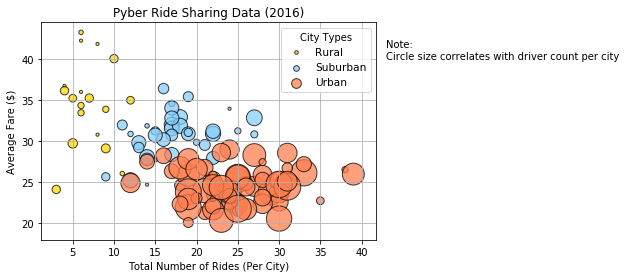

In [2]:
# Obtain the x and y coordinates for each of the three city types

#-----------------------
#create DF by type (Urban, Suburban, Rural)
#-----------------------
rural_df = merge_table.loc[merge_table["type"]== "Rural", :].sort_values("city")
#rural_df.head(500)
suburban_df = merge_table.loc[merge_table["type"]== "Suburban", :].sort_values("city")
#suburban_df
urban_df = merge_table.loc[merge_table["type"]== "Urban", :].sort_values("city")
#urban_df

#-----------------------------------
# Grouping rural/suburban/urban DF's above by city
#-----------------------------------
rural_grouped_df = rural_df.groupby(["city"])
#rural_grouped_df.head()
suburban_grouped_df = suburban_df.groupby(["city"])
#suburban_grouped_df.head()
urban_grouped_df = urban_df.groupby(["city"])
#urban_grouped_df.head()

#-----------------------------------
#Average Fare ($) Per City
#-----------------------------------
rural_fare_avg = rural_grouped_df["fare"].sum() / rural_grouped_df["city"].count()
#rural_fare_avg
suburban_fare_avg = suburban_grouped_df["fare"].sum() / suburban_grouped_df["city"].count()
#suburban_fare_avg
urban_fare_avg = urban_grouped_df["fare"].sum() / urban_grouped_df["city"].count()
urban_fare_avg

#-----------------------------------
#Total Number of Rides Per City
#-----------------------------------
rural_ride_cnt = rural_grouped_df["city"].count()
#rural_ride_cnt
suburban_ride_cnt = suburban_grouped_df["city"].count()
#suburban_ride_cnt
urban_ride_cnt = urban_grouped_df["city"].count()
#urban_ride_cnt

#-----------------------------------
#Total Number of Drivers Per City
#-----------------------------------
rural_driver_cnt = rural_grouped_df["driver_count"].mean()
#rural_driver_cnt
suburban_driver_cnt = suburban_grouped_df["driver_count"].mean()
#suburban_driver_cnt
urban_driver_cnt = urban_grouped_df["driver_count"].mean()
#urban_driver_cnt
city_types = "City Types"

#-----------------------------------
# Build the scatter plots for each city types
#-----------------------------------
rural_axis = plt.scatter(rural_ride_cnt, rural_fare_avg, marker="o", facecolors="gold", edgecolors="black",
                         s=rural_driver_cnt*10, alpha=0.75)

suburban_axis = plt.scatter(suburban_ride_cnt, suburban_fare_avg, marker="o", facecolors="lightskyblue", edgecolors="black",
                         s=suburban_driver_cnt*10, alpha=0.75)
            
urban_axis = plt.scatter(urban_ride_cnt, urban_fare_avg, marker="o", facecolors="coral", edgecolors="black",
                         s=urban_driver_cnt*10, alpha=0.75)

#-----------------------------------
# Create a legend
#-----------------------------------
plt.legend((rural_axis, suburban_axis, urban_axis),
           ("Rural", "Suburban", "Urban"), 
           title="City Types",
           markerscale=0.50,
           fontsize=10.5)

#-----------------------------------
# Incorporate the other graph properties
#-----------------------------------
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

#-----------------------------------
# Incorporate a text label regarding circle size
#-----------------------------------
plt.text( 43, 40, "Note:\nCircle size correlates with driver count per city")    

#-----------------------------------
# Save Figure
#-----------------------------------
plt.savefig("pyber_scatter_plot.png")
plt.show()    


## Total Fares by City Type

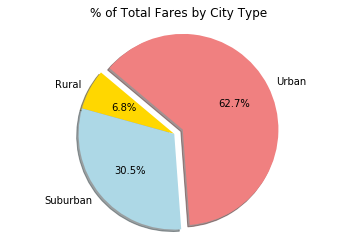

In [3]:
#-------------------------------------------
# Calculate Type Percents
#-------------------------------------------
rural_fare_sum = rural_df["fare"].sum()
suburban_fare_sum = suburban_df["fare"].sum()
urban_fare_sum = urban_df["fare"].sum()

#-------------------------------------------
# Build Pie Chart
#-------------------------------------------
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_fare_sum, suburban_fare_sum, urban_fare_sum]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#-------------------------------------------
# Save Figure
#-------------------------------------------
plt.savefig("pyber_total_fares_by_city_type.png")
plt.show() 


## Total Rides by City Type

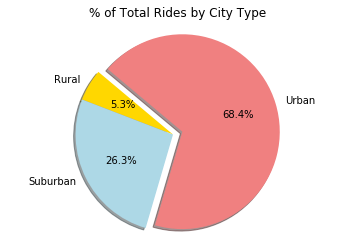

In [4]:
# Calculate Ride Percents

rural_ride_cnt = rural_df["type"].count()
suburban_ride_cnt = suburban_df["type"].count()
urban_ride_cnt = urban_df["type"].count()

#-------------------------------------------
# Build Pie Chart
#-------------------------------------------
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_ride_cnt, suburban_ride_cnt, urban_ride_cnt]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#-------------------------------------------
# Save Figure
#-------------------------------------------
plt.savefig("pyber_total_rides_by_city_type.png")
plt.show() 



## Total Drivers by City Type

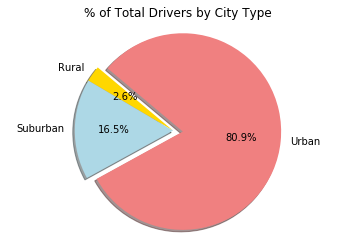

In [5]:
# Calculate Driver Percents

rural_driver_cnt = (rural_grouped_df["driver_count"].sum() / rural_grouped_df["driver_count"].count()).sum()

suburban_driver_cnt = (suburban_grouped_df["driver_count"].sum() / suburban_grouped_df["driver_count"].count()).sum()

urban_driver_cnt = (urban_grouped_df["driver_count"].sum() / urban_grouped_df["driver_count"].count()).sum()
 

#-------------------------------------------
# Build Pie Chart
#-------------------------------------------
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_driver_cnt, suburban_driver_cnt, urban_driver_cnt]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0, 0.0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#-------------------------------------------
# Save Figure
#-------------------------------------------
plt.savefig("pyber_total_drivers_by_city_type.png")
plt.show() 

In [ ]:
#Conclusions
#1.  Urban areas dominate across the board.
#2.  The suburbs came in at a not-so-close 2nd place in comparison to urban areas.
#3.  Rural areas had the least demand for Pyber ride-sharing services.
#4.  If one assumes population density is the driving force, where urban population > suburban population > rural population, 
#    then the numbers make sense, but not so quick!
#    According to the Pew Research Center:
#    (http://www.pewsocialtrends.org/2018/05/22/demographic-and-economic-trends-in-urban-suburban-and-rural-communities/)
#    SUBURBAN areas have a higher population that urban areas.  What!! So now other factors should be looked at, such as age,
#    socioeconomic status etc. to determine why urban areas are so dominant in ride-sharing.